In [2]:
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.models import load_model

In [16]:
def load_images(directory, size=(50, 50)):
    images = []
    labels = []
    label_dict = {}
    label_count = 0
    
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            label_dict[label] = label_count
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                try:
                    image = Image.open(image_path)
                    image = image.resize(size)
                    image = image.convert("L")  # Convert to grayscale
                    image_array = np.array(image)
                    # Store the image array without flattening
                    images.append(image_array)
                    labels.append(label_count)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
            label_count += 1
    
    return np.array(images), np.array(labels), label_dict

In [17]:
directory_path = "images"
images, labels, label_dict = load_images(directory_path)

np.save("data/x.npy", images)
np.save("data/y.npy", labels)
np.save("data/label_dict.npy", label_dict)

Error processing images\save\download.svg: cannot identify image file 'images\\save\\download.svg'


images:
 [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [136 137 137 ... 137 137 137]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[  0   0   0 ...   0   0   0]
  [  0  12  53 ...  53  13   0]
  [  0  55 253 ... 253  55   0]
  ...
  [  0  55 253 ... 252  57   0]
  [  0  12  53 ...  52  13   0]
  [  0   0   0 ... 

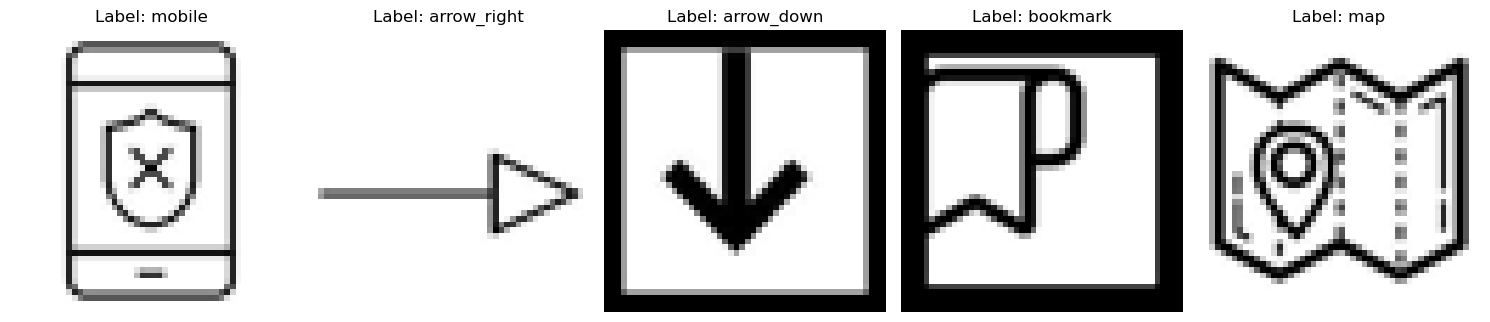

In [3]:
images = np.load("data/x.npy")
labels = np.load("data/y.npy")
label_dict = np.load("data/label_dict.npy", allow_pickle=True).item()

print("images:\n", images,"\n", np.shape(images))
print("labels:\n", labels,"\n", np.shape(labels))
print("label dict:\n", label_dict)

random_indices = random.sample(range(len(images)), 5)


plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(images[idx].reshape(50, 50), cmap='gray')
    plt.title(f"Label: {list(label_dict.keys())[labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
images = np.load("data/x.npy")
labels = np.load("data/y.npy")

images = images.astype('float32') / 255.0

num_images, img_height, img_width = images.shape
images = images.reshape(num_images, img_height, img_width, 1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(np.unique(labels)), activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(images, labels, epochs=10, batch_size=32, validation_split=0.2)

model.save('models/icon_classification_model_4.h5')

Epoch 1/10
3542/3542 [==============================] - 326s 92ms/step - loss: 2.1186 - accuracy: 0.5142 - val_loss: 18.8500 - val_accuracy: 0.0136
Epoch 2/10
3542/3542 [==============================] - 333s 94ms/step - loss: 1.2783 - accuracy: 0.6967 - val_loss: 20.7428 - val_accuracy: 0.0168
Epoch 3/10
3542/3542 [==============================] - 318s 90ms/step - loss: 1.0312 - accuracy: 0.7482 - val_loss: 25.9692 - val_accuracy: 0.0233
Epoch 4/10
3542/3542 [==============================] - 327s 92ms/step - loss: 0.8591 - accuracy: 0.7824 - val_loss: 28.4561 - val_accuracy: 0.0249
Epoch 5/10
3542/3542 [==============================] - 318s 90ms/step - loss: 0.7258 - accuracy: 0.8117 - val_loss: 28.6911 - val_accuracy: 0.0170
Epoch 6/10
3542/3542 [==============================] - 329s 93ms/step - loss: 0.6135 - accuracy: 0.8346 - val_loss: 32.4459 - val_accuracy: 0.0220
Epoch 7/10
3542/3542 [==============================] - 319s 90ms/step - loss: 0.5137 - accuracy: 0.8567 - val_l

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                  

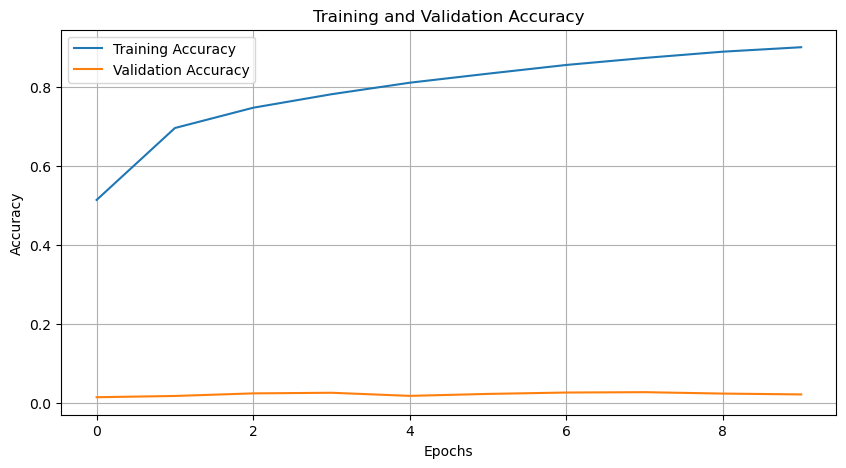

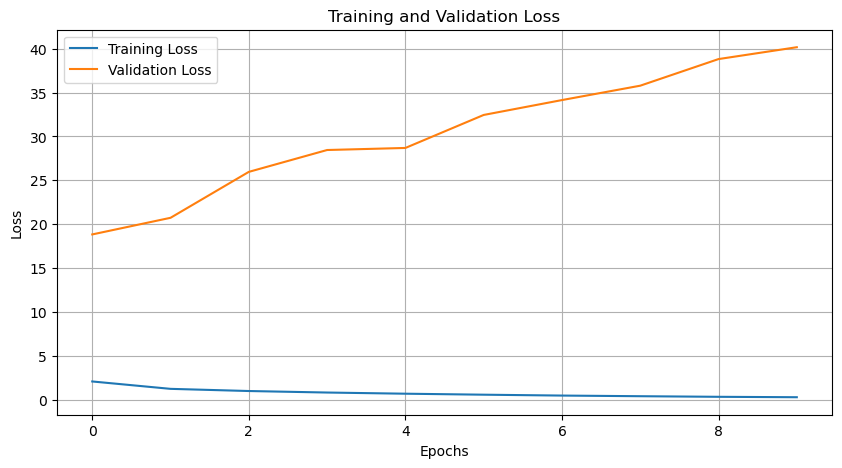

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
model = load_model('models/icon_classification_model_2.h5')

test_image_path = 'test.jpg'
img = Image.open(test_image_path)
img = img.resize((50, 50))
img = img.convert('L')
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0

img_array = img_array.reshape(1, 50, 50, 1)

predictions = model.predict(img_array)

top3_indices = np.argsort(predictions[0])[-3:][::-1]

label_dict = np.load("data/label_dict.npy", allow_pickle=True).item()

top3_labels = [list(label_dict.keys())[i] for i in top3_indices]

top3_probabilities = predictions[0][top3_indices]

for label, prob in zip(top3_labels, top3_probabilities):
    print(f"Label: {label}, Probability: {prob:.4f}")

1/1 [==============================] - 0s 86ms/step
Label: calculator, Probability: 0.9997
Label: qr_code, Probability: 0.0003
Label: menu, Probability: 0.0000
